In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#DATA_ROOT = Path(__file__).absolute().parent / 'data'
def show(x, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(x)


img = cv2.imread('data/Train/5.png')
img = cv2.cvtColor(255 - img, cv2.COLOR_BGR2GRAY)
# img = 100 + img
show(img)
# l, a, b = cv2.split(img)
# show(l)
# show(a)
# show(b)
# clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
# cl = clahe.apply(b)
# limg = cv2.merge((cl,a,b))
# show(limg)
# final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
# ff = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show(ff)

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
show(thresh)
# show('a_channel', a)
# show('b_channel', b)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# for cn in range(399,400):
#     edges = cv2.Canny(cl, 10, cn)
#     show(edges)
    

# for filename in glob.iglob("data/TrainDotted/*.png"):
#     for blob in get_data(basename(filename)):
#plt.subplot(121)
#show(edges)
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')


/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


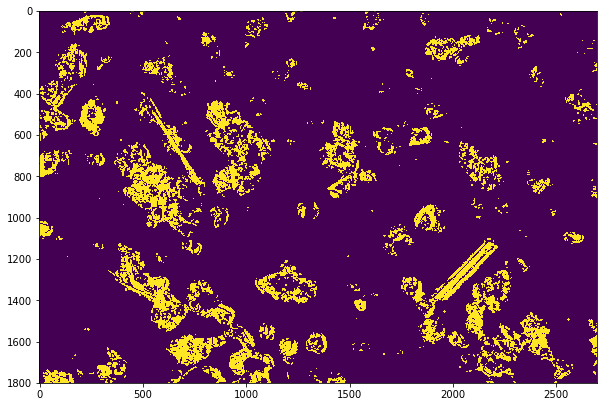

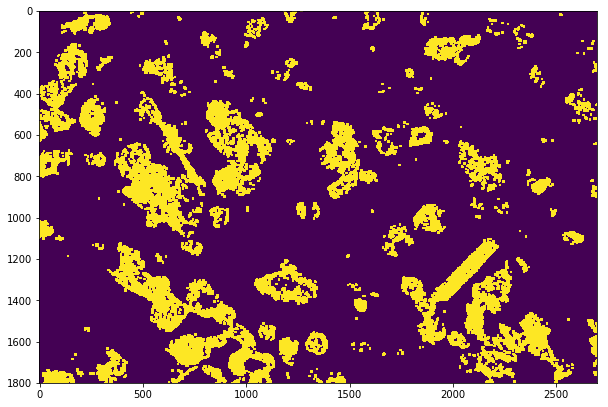

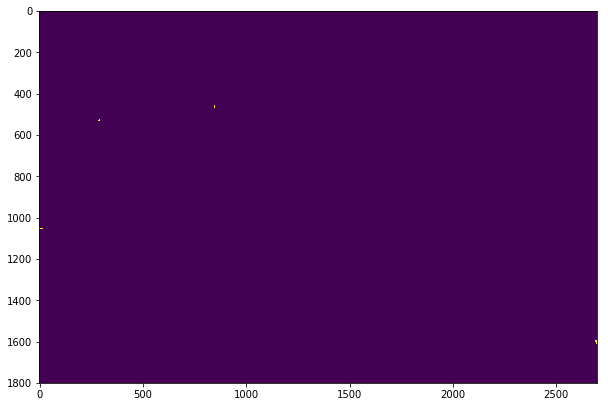

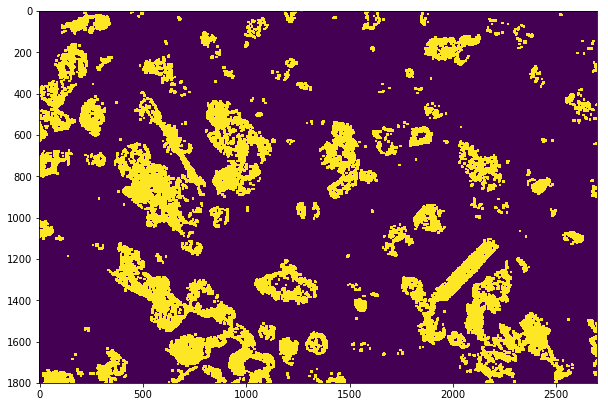

In [3]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
show(opening)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
show(sure_bg)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
show(sure_fg)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
show(unknown)

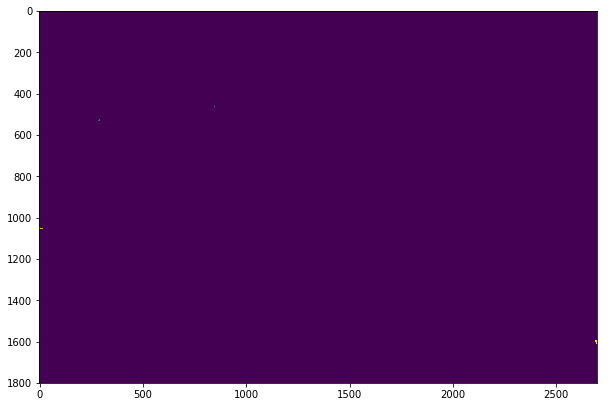

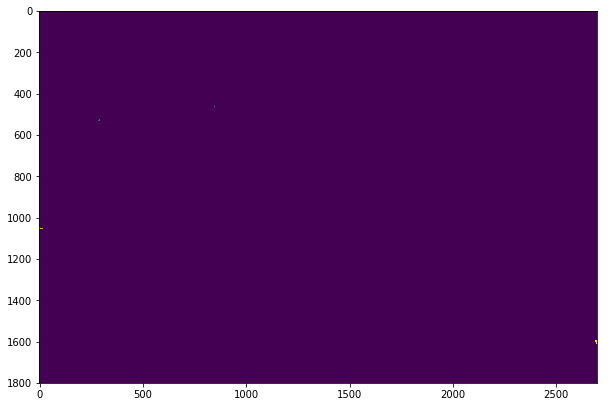

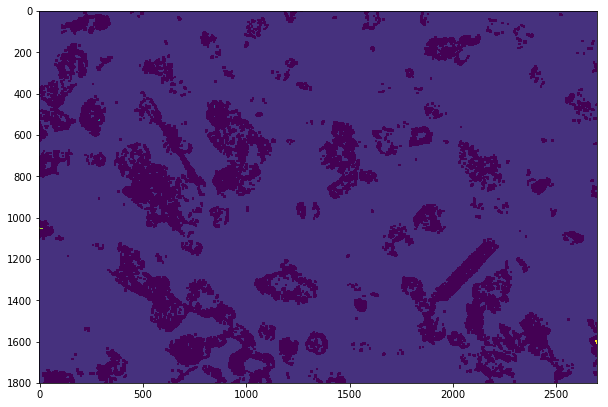

In [4]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
show(markers)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
show(markers)
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
show(markers)

ddd


TypeError: img is not a numpy array, neither a scalar

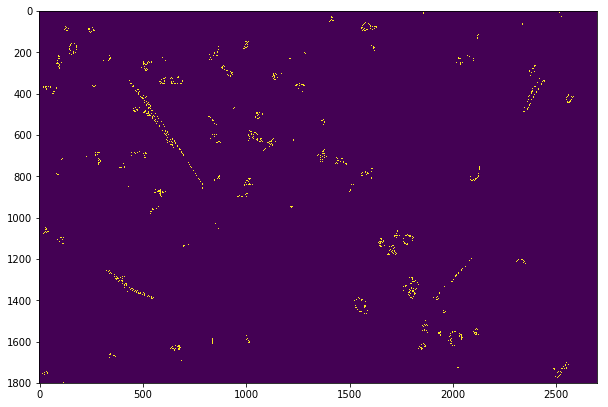

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def show(x, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(x)
img = cv2.imread('data/Train/5.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(imgray, 127, 255, 0)
edges = cv2.Canny(img, 10, 200)
# ret,thresh = cv2.threshold(edges,127,255,0)
# print(ret,thresh)
# contours,hierarchy = cv2.findContours(thresh, 1, 2)
# cnt = contours[0]
# M = cv2.moments(cnt)
# print(M)
#ret, thresh1 = cv2.threshold(imgray, 100, 120, cv2.THRESH_BINARY)
# x, y = thresh1.shape
# print(x, y)
arr = []
final_contours = []
im2, contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
show(im2)
print("ddd")

for i in range(len(contours)):
    cnt = contours[i]
    if cv2.contourArea(cnt) > 100 and cv2.contourArea(cnt) < 25000:
        cv2.drawContours(img, [cnt], -1, [0, 255, 255])
        cv2.fillConvexPoly(arr, cnt, [255, 255, 255])
        final_contours.append(cnt)
cv2.imshow('arr', arr)
#for i in range(len(contours)):
    #cv2.drawContours(im2, [contours[i]], -1, (0, 255, 255), 3)
#cv2.imshow("Game Boy Screen", im2)
# # cnt = contours[0]
# # M = cv.moments(cnt)
# print( M )

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(x, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(x)

img = cv2.imread('data/Train/5.png')
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img2 = cv2.medianBlur(cimg, 13)

ret, thresh1 = cv2.threshold(cimg, 100, 120, cv2.THRESH_BINARY)

x, y = thresh1.shape
arr = np.zeros((x, y, 3), np.uint8)
final_contours = []
image, contours, hierarchy = cv2.findContours(thresh1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.imshow('image', image)
for i in range(len(contours)):
    cnt = contours[i]
    if cv2.contourArea(cnt) > 100 and cv2.contourArea(cnt) < 25000:
        cv2.drawContours(img, [cnt], -1, [0, 255, 255])
        cv2.fillConvexPoly(arr, cnt, [255, 255, 255])
        final_contours.append(cnt)
cv2.imshow('arr', arr)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


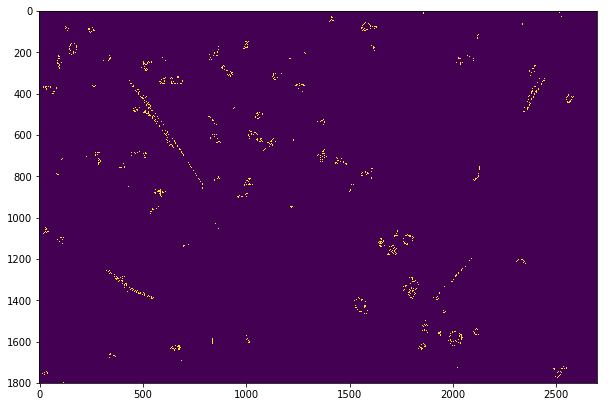

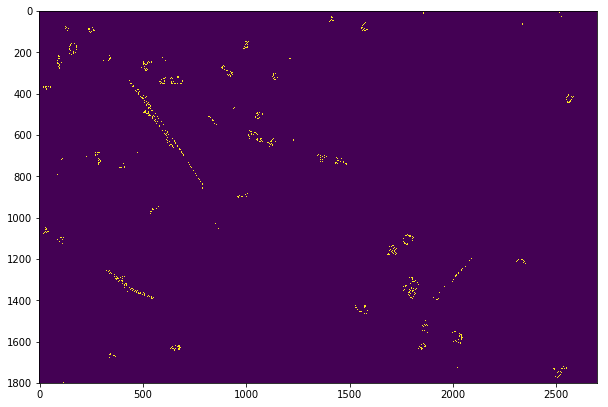

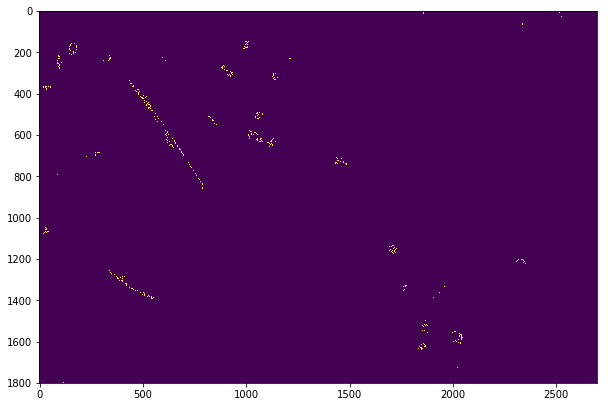

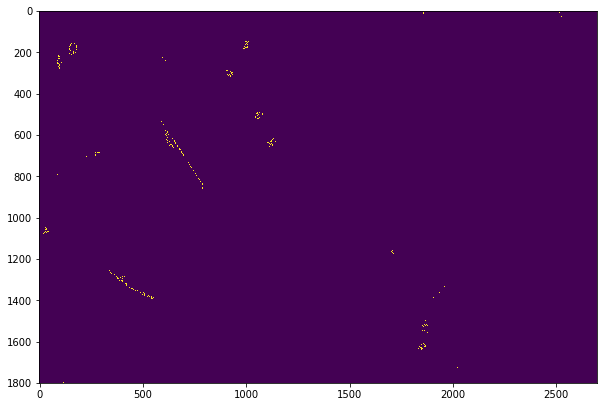

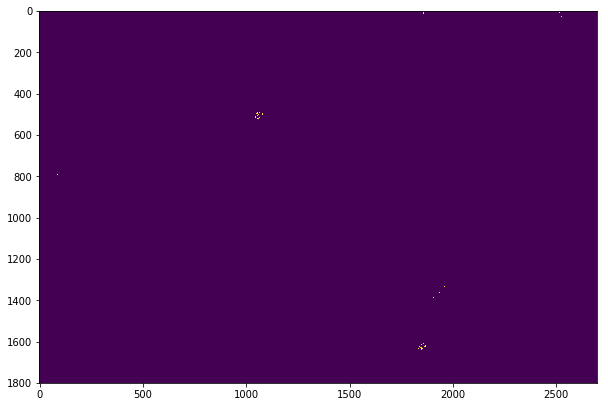

In [37]:
for cn in range(200,300,20):
    edges = cv2.Canny(img, 10, cn)
    show(edges)

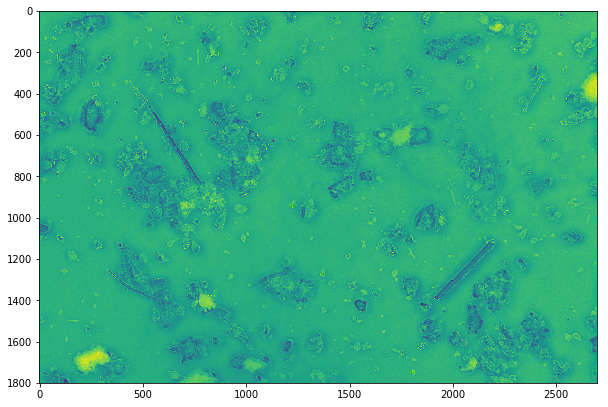

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def show(x, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(x)
img = cv2.imread('data/Train/5.png')
img = 255 - img
l, a, b = cv2.split(img)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(b)
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(image)

i


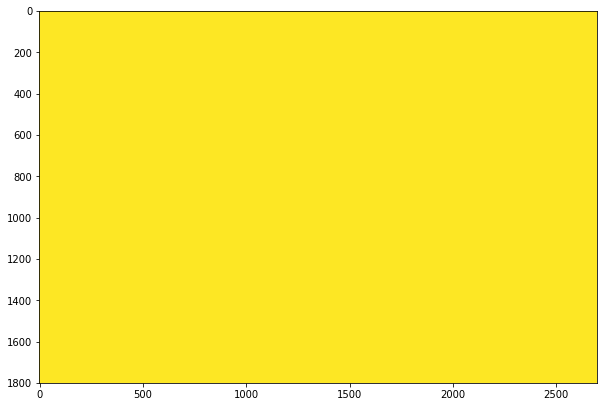

In [21]:
# edges = cv2.Canny(img, 10, 200)
_, all_contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image.fill(0)
boundingRect = []
firstFail = []
min_area = 100
# for j in [i for i in contours if cv2.contourArea(i) > minArea]:
#     br = cv2.boundingRect(j)
#     boundingRect.append(br)
# contours = np.array([contour for contour in all_contours\
#                          if min_area <= cv2.contourArea(contour)])
mask = np.ones(image.shape, np.uint8)
for i in all_contours:
    print("i")
    cv2.drawContours(mask, i, -1, [0, 255, 255])
show(mask)

In [ ]:


#-----Reading the image-----------------------------------------------------
img = cv2.imread('data/Train/5.png')
cv2.imshow("img",img) 

# #-----Converting image to LAB Color model----------------------------------- 
# lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# cv2.imshow("lab",lab)

# #-----Splitting the LAB image to different channels-------------------------
# l, a, b = cv2.split(lab)
# cv2.imshow('l_channel', l)
# cv2.imshow('a_channel', a)
# cv2.imshow('b_channel', b)

# #-----Applying CLAHE to L-channel-------------------------------------------
# clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
# cl = clahe.apply(l)
# cv2.imshow('CLAHE output', cl)

# #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
# limg = cv2.merge((cl,a,b))
# cv2.imshow('limg', limg)

# #-----Converting image from LAB Color model to RGB model--------------------
# final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
# cv2.imshow('final', final)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import measure
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import exposure
from skimage import data, img_as_float
import random
# img = Image.open('data/Train/5.png')
img = cv2.imread('data/Train/5.png')
# imgs = {"5": img, "6": img}

# # imgid = [5,6]
# # imgss = enumerate(imgs)
# imgsss = []
# # for i in range(10):
# #     print(random.choice(imgid))
# for im in imgs.items():
#     imgsss.append(im)
# print(imgsss[0][1])
# print(img.shape)
# print(img[:, :1800].shape)
# print(img[:, 900:2700].shape)
# plt.show(img)
# img = img_as_float(img)
p2, p98 = np.percentile(img, (2, 98))
r = exposure.rescale_intensity(img, in_range=(p2, p98))
print(r)
# r = np.max(img, axis=2)
# r = rgb2gray(r)
# plt.show(r)

# # # contours = measure.find_contours(r, 0.1)
# fig, ax = plt.subplots()
# ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

# # for n, contour in enumerate(contours):
# #     ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

# ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# plt.show()

[[[ 85  53  10]
  [ 85  53  21]
  [ 85  53  42]
  ...
  [ 53  31  10]
  [ 53  31  10]
  [ 53  42  21]]

 [[ 85  53  21]
  [ 85  53  21]
  [ 85  53  31]
  ...
  [ 53  31   0]
  [ 53  42  10]
  [ 53  42  21]]

 [[ 85  53  31]
  [ 85  53  31]
  [ 85  53  21]
  ...
  [ 63  31   0]
  [ 53  42   0]
  [ 63  42   0]]

 ...

 [[127  95  74]
  [127  95  74]
  [127  95  74]
  ...
  [116  85  74]
  [127  95  74]
  [116  95  74]]

 [[127  95  74]
  [ 95  74  53]
  [106  74  63]
  ...
  [106  85  63]
  [106  85  74]
  [ 95  95  74]]

 [[127  95  74]
  [127  95  74]
  [127  95  85]
  ...
  [106  74  53]
  [ 95  85  74]
  [ 85  85  74]]]


In [1]:
for n in range(1):
    print(n)

0


In [12]:
import skimage.io
img = cv2.imread('data/Train/5.png')
s = 256
mask = np.zeros((s, s), dtype=np.int64)
# mask[:] = 1
mask[30: 90, 100: 200] = 1
print(mask == 1)
skimage.io.imsave("testImage.png", mask.astype(np.float32))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [5]:
import numpy as np
s = 256
pred_img = np.ones((2, s, s), dtype=np.int64)
#          np.zeros((utils.N_CLASSES + 1, h, w), dtype=np.float32)
pred_count = np.ones((s, s), dtype=np.int32)
print((pred_img/np.maximum(pred_count, 1)).shape)

(2, 256, 256)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(x, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(x)

img = cv2.imread('data/Train/5.png')
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img, 10, 200)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
import math
def findFiber(image, threashold):
    dots = []
    
    cluster = []
    fibers = []
    
    for i, x in enumerate(image):
        for j, y in enumerate(x):
            if y > 0:
                # 0 is cluster label
                point = (i,j,0)
                point = list(point)
                dots.append(point)
    
    def distance(a, b):
        xa, ya, la = a
        xb, yb, lb = b
        return math.sqrt((xa-xb)**2+(ya-yb)**2)
#     a = (0,0,0)
#     b = (3,4,33)
#     a = list(a)
#     b = list(b)
#     print(distance(a, b))
    def find_neighbors(pivot, label):
        print(label)
        neighbors = []
        for dot in dots:
            if dot not in cluster and abs(pivot[0] - dot[0]) < threashold and abs(pivot[1] - dot[1]) < threashold:
                if distance(pivot, dot) < threashold:
                    neighbors.append(dot)
                    cluster.append(dot)
                    dot[2] = label
        for neighbor in neighbors:
            find_neighbors(neighbor, label)
        print(label, pivot)
        return
    
    def find_clusters():
        label = 1
        for dot in dots:
            if dot not in cluster:
                find_neighbors(dot, label)
                label += 1
#                 for neighbor in find_neighbors(dot, label):
#                     if neighbor[2] != 0:
#                         dot[2] = neighbor[2]
#                         break
#                 if dot[2] == 0:
#                     dot[2] = label
#                     label += 1
            
        print("total clusters:{}".format(label))
    
    find_clusters()
    counts = np.zeros(dots[-1][2]+1)
    big_cluster = []
    for dot in dots:
        counts[dot[2]] += 1
    for i, count in enumerate(counts):
        if count > 100:
            big_cluster.append(i)
    # set the image size
    image_new = np.zeros(image.shape)
    image_all_cluster = np.zeros(image.shape)
    for dot in dots:
        image_all_cluster[dot[0], dot[1]] = ((dot[2] + 1) * 10 + 50) % 255
        if dot[2] in big_cluster:
            image_new[dot[0], dot[1]] = ((dot[2] + 1) * 10 + 50) % 255
    show(image_new)
    show(image_all_cluster)

In [ ]:
findFiber(edges, 30)

1
1
1 [5, 2516, 1]
1
1 [5, 2517, 1]
1
1 [6, 2518, 1]
1
1 [7, 2515, 1]
1
1 [7, 2516, 1]
1
1 [7, 2517, 1]
1
1 [7, 2518, 1]
1
1 [7, 2519, 1]
1
1 [7, 2520, 1]
1
1 [7, 2521, 1]
1
1 [7, 2522, 1]
1
1 [8, 2514, 1]
1
1 [8, 2515, 1]
1
1 [8, 2522, 1]
1
1 [8, 2523, 1]
1
1 [9, 2514, 1]
1
1 [9, 2517, 1]
1
1 [9, 2518, 1]
1
1 [9, 2519, 1]
1
1 [9, 2520, 1]
1
1 [10, 2514, 1]
1
1 [10, 2516, 1]
1
1 [10, 2521, 1]
1
1 [10, 2522, 1]
1
1 [10, 2523, 1]
1
1 [11, 2513, 1]
1
1 [11, 2516, 1]
1
1 [11, 2524, 1]
1
1 [12, 2514, 1]
1
1 [12, 2516, 1]
1
1 [12, 2517, 1]
1
1 [12, 2524, 1]
1
1 [12, 2525, 1]
1
1 [12, 2526, 1]
1
1 [13, 2514, 1]
1
1 [13, 2517, 1]
1
1 [13, 2527, 1]
1
1 [14, 2514, 1]
1
1 [14, 2515, 1]
1
1 [14, 2518, 1]
1
1 [14, 2527, 1]
1
1 [14, 2528, 1]
1
1 [14, 2529, 1]
1
1 [15, 2515, 1]
1
1 [15, 2518, 1]
1
1 [15, 2519, 1]
1
1 [15, 2529, 1]
1
1 [16, 2516, 1]
1
1 [16, 2519, 1]
1
1 [16, 2529, 1]
1
1 [16, 2530, 1]
1
1 [17, 2516, 1]
1
1 [17, 2517, 1]
1
1 [17, 2518, 1]
1
1 [17, 2530, 1]
1
1 [18, 2530, 1]
1
1 [19, 2

4 [91, 1597, 4]
4
4 [91, 1598, 4]
4
4 [91, 1602, 4]
4
4 [91, 1603, 4]
4
4 [91, 1604, 4]
4
4 [92, 1587, 4]
4
4 [92, 1588, 4]
4
4 [92, 1591, 4]
4
4 [92, 1595, 4]
4
4 [92, 1598, 4]
4
4 [92, 1600, 4]
4
4 [92, 1601, 4]
4
4 [93, 1591, 4]
4
4 [93, 1592, 4]
4
4 [93, 1599, 4]
4
4 [94, 1585, 4]
4
4 [94, 1592, 4]
4
4 [94, 1593, 4]
4
4 [95, 1585, 4]
4
4 [95, 1590, 4]
4
4 [95, 1593, 4]
4
4 [96, 1585, 4]
4
4 [96, 1586, 4]
4
4 [96, 1587, 4]
4
4 [96, 1588, 4]
4
4 [96, 1589, 4]
4 [94, 1614, 4]
4
4 [96, 1616, 4]
4
4 [97, 1616, 4]
4 [76, 1635, 4]
4
4 [78, 1634, 4]
4
4 [79, 1633, 4]
4
4 [80, 1633, 4]
4
4 [84, 1629, 4]
4
4 [85, 1628, 4]
4
4 [85, 1629, 4]
4
4 [85, 1630, 4]
4
4 [86, 1626, 4]
4
4 [86, 1627, 4]
4
4 [87, 1625, 4]
4
4 [88, 1625, 4]
4
4 [89, 1624, 4]
4
4 [89, 1625, 4]
4
4 [90, 1618, 4]
4
4 [90, 1622, 4]
4
4 [90, 1623, 4]
4
4 [90, 1624, 4]
4
4 [91, 1615, 4]
4
4 [91, 1616, 4]
4
4 [91, 1617, 4]
4
4 [91, 1621, 4]
4
4 [91, 1622, 4]
4
4 [92, 1617, 4]
4
4 [92, 1620, 4]
4
4 [92, 1621, 4]
4
4 [93, 1616, 4

4 [74, 1567, 4]
4
4 [74, 1569, 4]
4
4 [74, 1597, 4]
4
4 [75, 1566, 4]
4
4 [75, 1569, 4]
4
4 [75, 1590, 4]
4
4 [75, 1591, 4]
4
4 [75, 1592, 4]
4
4 [75, 1593, 4]
4
4 [76, 1566, 4]
4
4 [76, 1568, 4]
4
4 [76, 1594, 4]
4
4 [77, 1568, 4]
4
4 [77, 1590, 4]
4
4 [77, 1591, 4]
4
4 [77, 1592, 4]
4
4 [77, 1593, 4]
4
4 [78, 1590, 4]
4 [50, 1580, 4]
5
5
5 [60, 2337, 5]
5
5 [60, 2338, 5]
5
5 [60, 2339, 5]
5
5 [61, 2337, 5]
5
5 [61, 2339, 5]
5
5 [62, 2337, 5]
5
5 [62, 2339, 5]
5
5 [63, 2337, 5]
5
5 [63, 2339, 5]
5
5 [64, 2336, 5]
5
5 [64, 2337, 5]
5
5 [64, 2339, 5]
5
5 [65, 2339, 5]
5
5 [66, 2332, 5]
5
5 [66, 2333, 5]
5
5 [66, 2334, 5]
5
5 [66, 2335, 5]
5
5 [66, 2336, 5]
5
5 [66, 2337, 5]
5
5 [66, 2339, 5]
5
5 [66, 2340, 5]
5
5 [67, 2331, 5]
5
5 [67, 2332, 5]
5
5 [67, 2337, 5]
5
5 [67, 2338, 5]
5
5 [68, 2331, 5]
5
5 [68, 2338, 5]
5
5 [68, 2339, 5]
5
5 [68, 2340, 5]
5
5 [69, 2331, 5]
5
5 [70, 2331, 5]
5
5 [71, 2331, 5]
5
5 [72, 2331, 5]
5
5 [73, 2331, 5]
5 [60, 2337, 5]
6
6
6 [74, 129, 6]
6
6 [74, 130,

9 [111, 2122, 9]
9
9 [111, 2123, 9]
9
9 [112, 2120, 9]
9
9 [112, 2123, 9]
9
9 [113, 2120, 9]
9
9 [113, 2122, 9]
9
9 [113, 2123, 9]
9
9 [113, 2124, 9]
9
9 [113, 2125, 9]
9
9 [113, 2126, 9]
9
9 [114, 2119, 9]
9
9 [114, 2122, 9]
9
9 [114, 2126, 9]
9
9 [114, 2127, 9]
9
9 [115, 2119, 9]
9
9 [115, 2121, 9]
9
9 [115, 2127, 9]
9
9 [116, 2119, 9]
9
9 [116, 2121, 9]
9
9 [116, 2128, 9]
9
9 [117, 2119, 9]
9
9 [117, 2121, 9]
9
9 [117, 2128, 9]
9
9 [117, 2129, 9]
9
9 [118, 2119, 9]
9
9 [118, 2121, 9]
9
9 [118, 2129, 9]
9
9 [119, 2119, 9]
9
9 [119, 2121, 9]
9
9 [119, 2126, 9]
9
9 [119, 2129, 9]
9
9 [120, 2119, 9]
9
9 [120, 2121, 9]
9
9 [120, 2126, 9]
9
9 [120, 2127, 9]
9
9 [120, 2128, 9]
9
9 [120, 2129, 9]
9
9 [121, 2118, 9]
9
9 [121, 2119, 9]
9
9 [121, 2121, 9]
9
9 [122, 2118, 9]
9
9 [122, 2121, 9]
9
9 [123, 2118, 9]
9
9 [123, 2119, 9]
9
9 [123, 2120, 9]
9
9 [124, 2120, 9]
9
9 [125, 2121, 9]
9
9 [126, 2121, 9]
9
9 [127, 2121, 9]
9
9 [128, 2121, 9]
9
9 [129, 2121, 9]
9
9 [129, 2122, 9]
9
9 [130, 2122

11 [191, 184, 11]
11
11 [191, 185, 11]
11
11 [192, 171, 11]
11
11 [192, 172, 11]
11
11 [192, 176, 11]
11
11 [193, 170, 11]
11
11 [193, 171, 11]
11
11 [193, 174, 11]
11
11 [193, 175, 11]
11
11 [194, 170, 11]
11
11 [194, 173, 11]
11
11 [194, 174, 11]
11
11 [195, 165, 11]
11
11 [195, 166, 11]
11
11 [195, 167, 11]
11
11 [195, 168, 11]
11
11 [195, 169, 11]
11
11 [195, 172, 11]
11
11 [195, 173, 11]
11
11 [196, 169, 11]
11
11 [196, 172, 11]
11
11 [197, 168, 11]
11
11 [197, 169, 11]
11
11 [197, 172, 11]
11
11 [197, 173, 11]
11
11 [197, 174, 11]
11
11 [197, 175, 11]
11
11 [197, 176, 11]
11
11 [197, 177, 11]
11
11 [198, 167, 11]
11
11 [198, 168, 11]
11
11 [198, 177, 11]
11
11 [199, 167, 11]
11
11 [199, 176, 11]
11
11 [199, 177, 11]
11
11 [200, 164, 11]
11
11 [200, 165, 11]
11
11 [200, 166, 11]
11
11 [200, 167, 11]
11
11 [200, 172, 11]
11
11 [200, 173, 11]
11
11 [200, 174, 11]
11
11 [200, 175, 11]
11
11 [200, 176, 11]
11
11 [201, 146, 11]
11
11 [201, 147, 11]
11
11 [201, 148, 11]
11
11 [201, 149,

12 [189, 1619, 12]
12
12 [189, 1620, 12]
12
12 [189, 1621, 12]
12
12 [190, 1619, 12]
12
12 [190, 1622, 12]
12
12 [193, 1612, 12]
12
12 [193, 1613, 12]
12 [164, 1608, 12]
12
12 [164, 1609, 12]
12
12 [164, 1610, 12]
12
12 [165, 1600, 12]
12
12 [165, 1601, 12]
12
12 [165, 1603, 12]
12
12 [165, 1604, 12]
12
12 [165, 1605, 12]
12
12 [165, 1611, 12]
12
12 [165, 1612, 12]
12
12 [165, 1613, 12]
12
12 [166, 1603, 12]
12
12 [166, 1607, 12]
12
12 [166, 1608, 12]
12
12 [166, 1609, 12]
12
12 [166, 1610, 12]
12
12 [166, 1614, 12]
12
12 [166, 1615, 12]
12
12 [166, 1616, 12]
12
12 [167, 1600, 12]
12
12 [167, 1601, 12]
12
12 [167, 1602, 12]
12
12 [167, 1603, 12]
12
12 [167, 1604, 12]
12
12 [167, 1605, 12]
12
12 [167, 1606, 12]
12
12 [167, 1610, 12]
12
12 [167, 1611, 12]
12
12 [167, 1616, 12]
12
12 [167, 1617, 12]
12
12 [168, 1611, 12]
12
12 [168, 1612, 12]
12
12 [168, 1618, 12]
12
12 [168, 1619, 12]
12
12 [169, 1612, 12]
12
12 [169, 1613, 12]
12
12 [169, 1614, 12]
12
12 [169, 1616, 12]
12
12 [169, 1619

13 [216, 866, 13]
13
13 [217, 846, 13]
13
13 [217, 847, 13]
13
13 [217, 848, 13]
13
13 [217, 853, 13]
13
13 [217, 854, 13]
13
13 [217, 864, 13]
13
13 [218, 854, 13]
13
13 [218, 855, 13]
13
13 [218, 856, 13]
13
13 [218, 860, 13]
13
13 [218, 861, 13]
13
13 [218, 862, 13]
13
13 [218, 863, 13]
13
13 [219, 857, 13]
13
13 [219, 858, 13]
13
13 [219, 859, 13]
13 [196, 862, 13]
13
13 [196, 863, 13]
13 [167, 864, 13]
13
13 [167, 865, 13]
13
13 [167, 866, 13]
13
13 [168, 866, 13]
13
13 [168, 867, 13]
13
13 [169, 867, 13]
13
13 [170, 867, 13]
13
13 [170, 868, 13]
13
13 [171, 868, 13]
13
13 [172, 869, 13]
13
13 [173, 869, 13]
13
13 [174, 869, 13]
13
13 [175, 869, 13]
13
13 [176, 870, 13]
13
13 [177, 870, 13]
13
13 [178, 870, 13]
13
13 [179, 870, 13]
13
13 [180, 870, 13]
13
13 [181, 869, 13]
13
13 [182, 869, 13]
13
13 [183, 869, 13]
13
13 [184, 869, 13]
13
13 [185, 868, 13]
13
13 [185, 869, 13]
13
13 [186, 867, 13]
13
13 [186, 868, 13]
13
13 [187, 864, 13]
13
13 [187, 866, 13]
13
13 [187, 867, 13]
1

16 [210, 91, 16]
16
16 [210, 92, 16]
16
16 [210, 98, 16]
16
16 [211, 87, 16]
16
16 [211, 88, 16]
16
16 [211, 90, 16]
16
16 [211, 91, 16]
16
16 [211, 98, 16]
16
16 [212, 87, 16]
16
16 [212, 90, 16]
16
16 [212, 94, 16]
16
16 [212, 97, 16]
16
16 [212, 98, 16]
16
16 [213, 87, 16]
16
16 [213, 90, 16]
16
16 [213, 95, 16]
16
16 [213, 96, 16]
16
16 [213, 97, 16]
16
16 [214, 87, 16]
16
16 [214, 90, 16]
16
16 [214, 95, 16]
16
16 [215, 87, 16]
16
16 [215, 90, 16]
16
16 [215, 93, 16]
16
16 [215, 94, 16]
16
16 [215, 95, 16]
16
16 [216, 87, 16]
16
16 [216, 90, 16]
16
16 [216, 95, 16]
16
16 [217, 87, 16]
16
16 [217, 90, 16]
16
16 [217, 95, 16]
16
16 [218, 88, 16]
16
16 [218, 91, 16]
16
16 [218, 95, 16]
16
16 [219, 87, 16]
16
16 [219, 91, 16]
16
16 [219, 92, 16]
16
16 [219, 95, 16]
16
16 [219, 97, 16]
16
16 [219, 98, 16]
16
16 [220, 87, 16]
16
16 [220, 93, 16]
16
16 [220, 94, 16]
16
16 [220, 98, 16]
16
16 [220, 99, 16]
16
16 [221, 87, 16]
16
16 [221, 94, 16]
16
16 [221, 95, 16]
16
16 [221, 99, 16]
16


18 [225, 2038, 18]
18
18 [225, 2040, 18]
18
18 [225, 2041, 18]
18
18 [225, 2042, 18]
18
18 [226, 2028, 18]
18
18 [226, 2029, 18]
18
18 [226, 2032, 18]
18
18 [226, 2033, 18]
18
18 [226, 2041, 18]
18
18 [227, 2027, 18]
18
18 [227, 2028, 18]
18
18 [227, 2031, 18]
18
18 [227, 2033, 18]
18
18 [227, 2034, 18]
18
18 [227, 2037, 18]
18
18 [227, 2038, 18]
18
18 [227, 2039, 18]
18
18 [227, 2042, 18]
18
18 [228, 2026, 18]
18
18 [228, 2027, 18]
18
18 [228, 2030, 18]
18
18 [228, 2031, 18]
18
18 [228, 2034, 18]
18
18 [228, 2037, 18]
18
18 [228, 2040, 18]
18
18 [229, 2026, 18]
18
18 [229, 2029, 18]
18
18 [229, 2030, 18]
18
18 [229, 2034, 18]
18
18 [229, 2035, 18]
18
18 [229, 2036, 18]
18
18 [229, 2037, 18]
18
18 [229, 2038, 18]
18
18 [229, 2039, 18]
18
18 [229, 2041, 18]
18
18 [230, 2025, 18]
18
18 [230, 2026, 18]
18
18 [230, 2028, 18]
18
18 [230, 2029, 18]
18
18 [230, 2033, 18]
18
18 [230, 2042, 18]
18
18 [230, 2043, 18]
18
18 [231, 2022, 18]
18
18 [231, 2023, 18]
18
18 [231, 2025, 18]
18
18 [231, 2

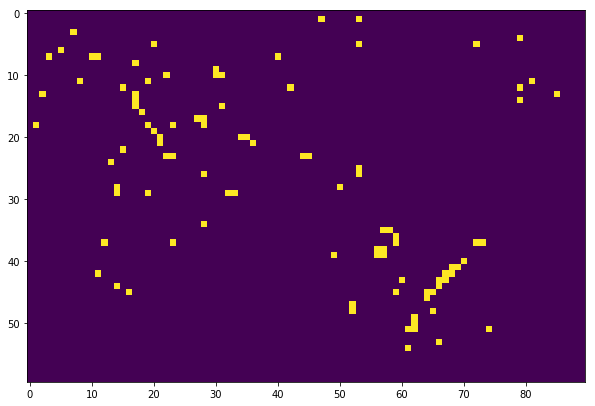

In [34]:
edgesC2 = cv2.resize(edgesC, (90,60))
edgesC2[edgesC2>0]=255
show(edgesC2)

total clusters:47


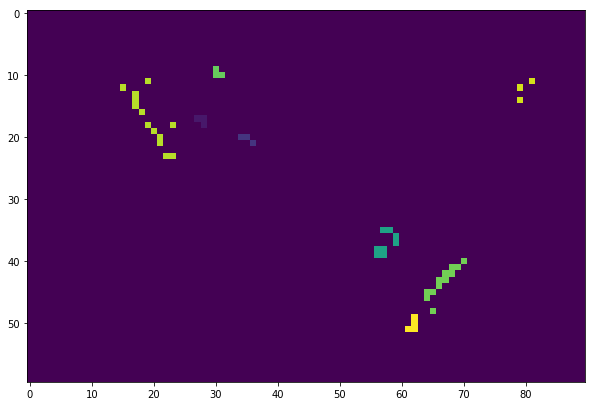

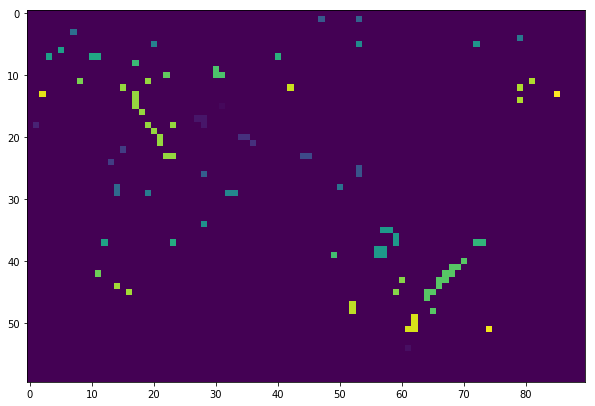

In [33]:
findFiber(edgesC2, 3)

In [3]:
import numpy as np
image_new = np.zeros((60, 90))
image_new[1,2] = 1
print(image_new[1,2])

1.0


In [22]:
edgesC.shape

(1800, 2700)